# Prohack: 2nd Task

We had to allocate energy for Galaxies knowing that : 
* Every galaxy has a certain limited potential for improvement in the index described by the following function: Potential for increase in the Index = -np.log(Index+0.01)+3 
* Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function: Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000
* **There are several constraints:**
  * In total there are 50000 zillion DSML available for allocation.
  * No galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML .
  * galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available.







#Importing the preds

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ss=pd.read_csv('new_preds.csv')

**Defining the Potential Increase and Likely Increase in the index** 

In [ ]:
#The index represent the y_pred 
index = ss['pred']
pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
ss["p2"] = p2

In [ ]:
#Sorting using Likelyincreasing index
ss=ss.sort_values('p2',ascending=False)
#Droping The old index 
ss=ss.reset_index(drop=True)

In [ ]:
ss

,Index,pred,opt_pred,eei,p2
0,49,0.017404,0,0.671839,43.521325
1,228,0.018274,0,0.837479,43.109723
2,138,0.018336,0,0.775467,43.081108
3,186,0.018623,0,0.806444,42.948887
4,201,0.018673,0,0.816966,42.925849
...,...,...,...,...,...
885,800,0.443243,0,1.085557,14.374152
886,801,0.443628,0,1.086098,14.367718
887,705,0.446518,0,1.038657,14.319613
888,583,0.470094,0,0.996074,13.941070


# Optimisation

We'll start talking about our optimisation, which might not be the best approach since we believe that it overfitted the public LB: 
* We've noticed that giving max energy (100 Zillion DSML) for the first 400 rows would give a good score because there's a huge drop in the values of  y_preds, as we've seen in the 1st notebook, *y is highly skewed*
* Then we started decreasing linearly (and the overfitting started here )
* We took random decreasing steps and random intervals and we were trying to maximize the sum of galaxies with low existence expectancy index below 0.7 because we knew that it had to be more than 5000 Zillion DSML.

These points have been taken empicially and through intuition mostly by analyzing the y. Taking different points would result in choosing different slopes for the linear decrease.

**How to find these slopes ?**

You need to pick some points and compute a given slope between each two points while checking the sum of allocated energy in order to make it equal or almost equal to 50000 units.




**Linear Programming**
* We've tried solving this optimisation task using scipy.optimize using constraints and objective function but we got a better score while using the idea of decreasing linearly, so we didn't focus on it .

**Analyzing the y_preds**

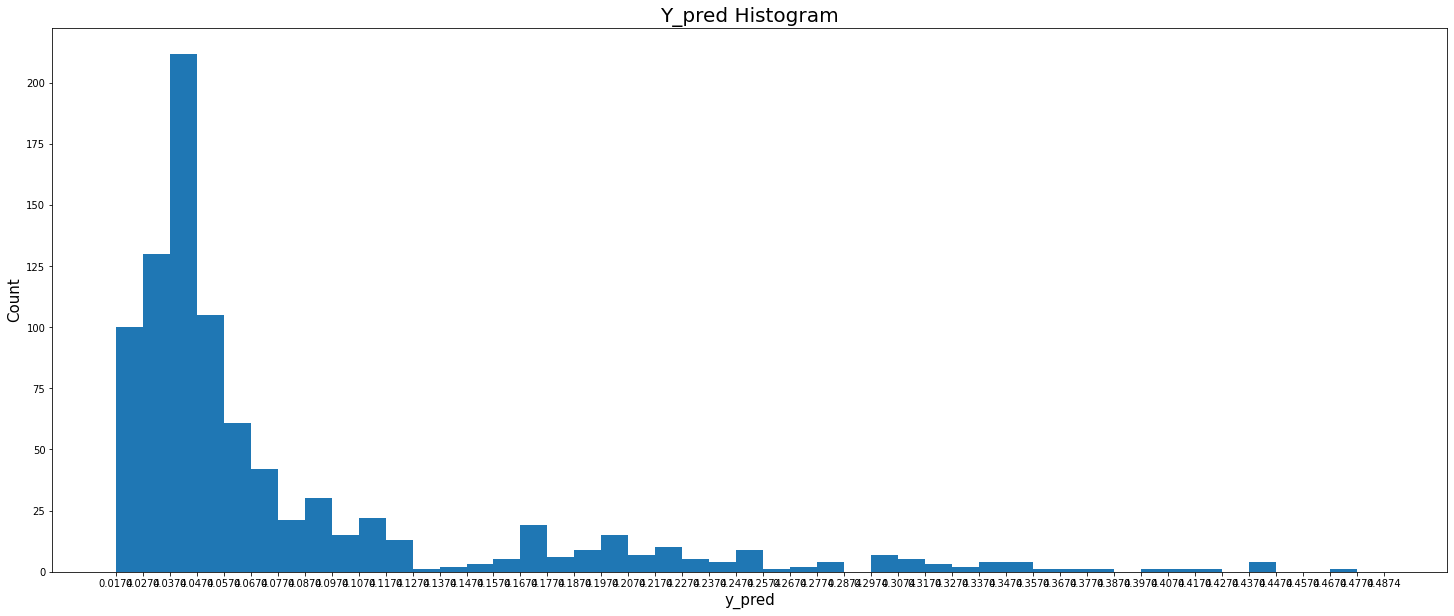

In [ ]:
y_pred=ss.pred
x = np.arange(y_pred.min(),y_pred.max(),0.01)
plt.figure(figsize=(25,10))
plt.hist(y_pred,bins=x)
plt.title('Y_pred Histogram',fontsize=20)
plt.xlabel('y_pred',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(x)
plt.show()

In [ ]:

n = 340
#Giving the max of Energy to the 340 first element (ordered using the likely Increasing Index)
ss.opt_pred[:n]=100
ss.opt_pred[n:] = 0
c=100
alpha = 0.62685
for i in range(n,374):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
alpha=0.067345
for i in range(374,455):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
  else:
    ss.loc[i,'opt_pred'] = 0
alpha = 0.03
for i in range(455,465):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
alpha=0.4339465
for i in range(465,890):
  if c>=alpha: 
    c=c-alpha
    ss.loc[i,'opt_pred'] =c
  else:
    ss.loc[i,'opt_pred'] = 0

print(ss.opt_pred.sum())

49999.995680999906


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Checking if the sum of opt_pred in rows having eei<0.7 is >5000
print("sum",ss.opt_pred.sum())
print("left", (50000-ss.opt_pred.sum())) 
print("eei Sum",ss[ss.eei<0.7]['opt_pred'].sum())

sum 49999.995680999906
left 0.004319000094255898
eei Sum 6520.424461499999


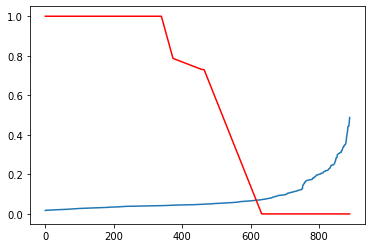

In [ ]:
# Plot opt pred vs y
plt.plot(ss.pred)
plt.plot(ss.opt_pred/100,color="red")
plt.show()

## The new untested optimisation

15 Minutes before the deadline, we knew that we overfitted the optimisation.
We figured out a method to decreases the overfitting but unfortunately we couldn't test it.

The main idea is making a step that depends on the difference in the index between each two lines (we could use likely Increasing Index too) .

In [ ]:
#We aren't so sure that allocating 100 Zillion DSML to the 340 first rows is optimal  
ss.opt_pred=0
n = 340
ss.opt_pred[:n]=100
ss.opt_pred[n:] = 0
c=100
#This is a simple test we could add more steps or maybe changing these one
for i in range(n,890):
  if ss.pred[i]-ss.pred[i-1]<4*10**(-6):
    alpha=0.13
  if ss.pred[i]-ss.pred[i-1]>=4*10**(-6) and ss.pred[i]-ss.pred[i-1]<4*10**(-5):
    alpha=0.21222895
  if ss.pred[i]-ss.pred[i-1]>=4*10**(-5) and ss.pred[i]-ss.pred[i-1]<10**(-4):
    alpha=0.33
  if ss.pred[i]-ss.pred[i-1]>=10**(-4) and ss.pred[i]-ss.pred[i-1]<5*10**(-3) :
    alpha=0.48
  if ss.pred[i]-ss.pred[i-1]>=5*10**(-3) and ss.pred[i]-ss.pred[i-1]<10**(-3):
    alpha=0.58
  if ss.pred[i]-ss.pred[i-1]>=10**(-3):
    alpha=0.73
  c-=alpha
  if c-alpha>0:
    ss.loc[i,'opt_pred'] =c
  else:
    ss.loc[i,'opt_pred'] =0

print(ss.opt_pred.sum())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


49999.999927200086


In [ ]:
#Checking if the sum of opt_pred in rows having eei<0.7 is >5000
print("sum",ss.opt_pred.sum())
print("left", (50000-ss.opt_pred.sum()))
print("eei",ss[ss.eei<0.7]['opt_pred'].sum())

sum 49999.999927200086
left 7.279991405084729e-05
eei 6542.4094493500015


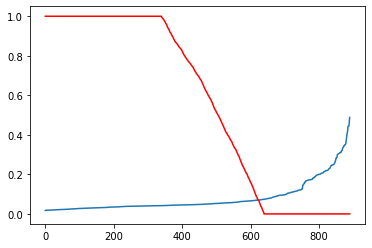

In [ ]:
plt.plot(ss.pred)
plt.plot(ss.opt_pred/100,color="red")
plt.show()

#Submiting the result

In [ ]:
#Reordering the list using the real index
ss=ss.sort_values('Index',ascending=True)
ss=ss.reset_index(drop=True)

In [ ]:
ss[['Index', 'pred', 'opt_pred']].to_csv('sub.csv', index=False)